##import library

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
import sklearn

##load data

In [ ]:
df = pd.read_csv("/content/features.csv")
df = df.iloc[:,1:29]
df.head()

,filename,chroma_stft,rms,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,Bandari_1443.wav,0.385338,0.321449,2742.200969,2730.893005,5997.863732,0.136198,20.062084,78.168983,6.033637,23.952497,8.421409,2.025541,-10.654094,6.750089,-9.548324,3.632612,-3.931255,1.080126,0.501369,3.819694,0.632546,4.022167,-8.230503,2.809771,-2.186619,-0.454575,Bandari
1,Bandari_561.wav,0.360864,0.131163,2761.785385,2591.650156,5697.648880,0.147271,-57.712135,75.162651,-11.747077,23.997705,0.522057,9.510628,0.444517,0.156660,-1.297874,1.958092,-4.801153,3.877494,-2.817235,5.846106,-4.051405,2.599230,-6.418496,-2.665313,-3.070375,5.995946,Bandari
2,Bandari_510.wav,0.256995,0.206920,2716.665536,2954.971978,6309.039628,0.097525,-94.775764,74.480568,25.467127,8.992518,6.258727,11.999546,10.816494,13.319936,-1.114603,2.158527,-2.738725,4.824709,4.432208,4.557103,-5.857443,-1.156024,-6.441401,3.425208,-2.205493,0.934923,Bandari
3,Bandari_716.wav,0.400040,0.235502,2843.018475,2931.418769,6558.665896,0.107354,-24.535557,70.013870,17.683250,25.532721,4.828485,8.666070,4.614975,8.587525,-3.646995,9.565742,-1.217263,4.292939,0.169256,5.688190,-2.197018,3.345847,-5.779459,-0.948961,-7.175944,-3.015051,Bandari
4,Bandari_698.wav,0.386944,0.296843,2419.476985,2708.287612,5658.276896,0.086569,-35.459721,79.925049,9.250431,13.760175,-3.395043,10.120485,-3.976239,2.935897,-3.835881,3.458317,-0.394308,7.320758,-0.021413,7.607381,0.188875,4.050068,-2.461287,2.061041,-3.238700,1.078692,Bandari


In [ ]:
print('Bandari:',len(df[df['label']=='Bandari']))
print('Gilaki:',len(df[df['label']=='Gilaki']))
print('Kordi:',len(df[df['label']=='Kordi']))
print('Lori:',len(df[df['label']=='Lori']))
print('Torki:',len(df[df['label']=='Torki']))

Bandari: 1707
Gilaki: 1507
Kordi: 1688
Lori: 1708
Torki: 1411


**Balanced Data**

In [ ]:
max_size = 1708
dataset = [df]
for class_index, group in df.groupby('label'):
    dataset.append(group.sample(max_size-len(group), replace=True , random_state=1))
balanced_df = pd.concat(dataset)
balanced_df.reset_index(drop=True)
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

In [ ]:
print('Bandari:',len(balanced_df[balanced_df['label']=='Bandari']))
print('Gilaki:',len(balanced_df[balanced_df['label']=='Gilaki']))
print('Kordi:',len(balanced_df[balanced_df['label']=='Kordi']))
print('Lori:',len(balanced_df[balanced_df['label']=='Lori']))
print('Torki:',len(balanced_df[balanced_df['label']=='Torki']))

Bandari: 1708
Gilaki: 1708
Kordi: 1708
Lori: 1708
Torki: 1708


In [ ]:
features = balanced_df.iloc[:,1:27].values

label = balanced_df['label']
features.shape

(8540, 26)

##clustering

**Unscaled Data Classification**

In [ ]:
# define the model
for n_clusters in range(1,6):
    # define the model
    model = KMeans(n_clusters= n_clusters, random_state= 6)

    # fit model and predict clusters
    y_pred = model.fit_predict(features)

    #get information cluster

    #create datframe for statistics
    list1 = [ 'chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'zero_crossing_rate']
    list2 = [f'mfcc{i}' for i in range(1,21)]
    header = list1 + list2 
    df = pd.DataFrame(data = features,columns=header)
    df['label'] = label
    df['pred_cluster'] = y_pred
    pd.set_option("display.max_columns", None)

    print("///////////////////////////////////////////////////////////////////////////////////")
    print(f"information each {n_clusters} cluster in kmean clustering algortihm with n_clusters = {n_clusters}")
    print("///////////////////////////////////////////////////////////////////////////////////")
    print()
    for cluster in np.unique(y_pred):
        temp_df = df.loc[df['pred_cluster'] == cluster ]
        print("------------------------------------------------------------------------------")
        print(f"information of cluster {cluster+1} in kmean clustering algortihm with n_clusters = {n_clusters}")
        print("------------------------------------------------------------------------------")
        print(temp_df.iloc[:, 0:26].describe())
        print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
        print(temp_df.label.value_counts())
        print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
        print()

///////////////////////////////////////////////////////////////////////////////////
information each 1 cluster in kmean clustering algortihm with n_clusters = 1
///////////////////////////////////////////////////////////////////////////////////

------------------------------------------------------------------------------
information of cluster 1 in kmean clustering algortihm with n_clusters = 1
------------------------------------------------------------------------------
       chroma_stft          rms  spectral_centroid  spectral_bandwidth  \
count  8540.000000  8540.000000        8540.000000         8540.000000   
mean      0.325737     0.187265        2393.692616         2344.569583   
std       0.065456     0.084438         613.340268          479.593017   
min       0.157700     0.006270         159.783408          637.105049   
25%       0.279260     0.123617        1984.390768         2077.721130   
50%       0.321654     0.183480        2414.810286         2461.593851   
75%

In [ ]:
# define the model
for n_clusters in range(1,6):
    # define the model
    model = AgglomerativeClustering(n_clusters=n_clusters)

    # fit model and predict clusters
    y_pred = model.fit_predict(features)

    #get information cluster

    #create datframe for statistics
    list1 = [ 'chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'zero_crossing_rate']
    list2 = [f'mfcc{i}' for i in range(1,21)]
    header = list1 + list2 
    df = pd.DataFrame(data = features,columns=header)
    df['label'] = label
    df['pred_cluster'] = y_pred
    pd.set_option("display.max_columns", None)

    print("///////////////////////////////////////////////////////////////////////////////////")
    print(f"information each {n_clusters} cluster in AgglomerativeClustering clustering algortihm with n_clusters = {n_clusters}")
    print("///////////////////////////////////////////////////////////////////////////////////")
    print()
    for cluster in np.unique(y_pred):
        temp_df = df.loc[df['pred_cluster'] == cluster ]
        print("------------------------------------------------------------------------------")
        print(f"information of cluster {cluster+1} in AgglomerativeClustering clustering algortihm with n_clusters = {n_clusters}")
        print("------------------------------------------------------------------------------")
        print(temp_df.iloc[:, 0:26].describe())
        print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
        print(temp_df.label.value_counts())
        print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
        print()

///////////////////////////////////////////////////////////////////////////////////
information each 1 cluster in AgglomerativeClustering clustering algortihm with n_clusters = 1
///////////////////////////////////////////////////////////////////////////////////

------------------------------------------------------------------------------
information of cluster 1 in AgglomerativeClustering clustering algortihm with n_clusters = 1
------------------------------------------------------------------------------
       chroma_stft          rms  spectral_centroid  spectral_bandwidth  \
count  8540.000000  8540.000000        8540.000000         8540.000000   
mean      0.325737     0.187265        2393.692616         2344.569583   
std       0.065456     0.084438         613.340268          479.593017   
min       0.157700     0.006270         159.783408          637.105049   
25%       0.279260     0.123617        1984.390768         2077.721130   
50%       0.321654     0.183480        24

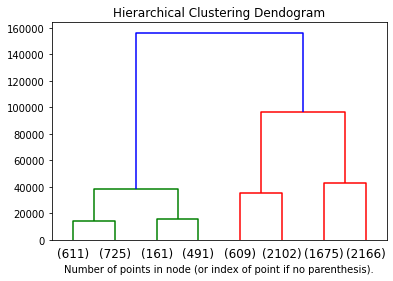

In [ ]:
#plot dendogram for AgglomerativeClustering
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(features)

# plot the top p levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=2)

plt.title('Hierarchical Clustering Dendogram')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
# define the model
for n_clusters in range(1,6):
    # define the model
    model = GaussianMixture(n_components=n_clusters)

    # fit model and predict clusters
    y_pred = model.fit_predict(features)

    #get information cluster

    #create datframe for statistics
    list1 = [ 'chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'zero_crossing_rate']
    list2 = [f'mfcc{i}' for i in range(1,21)]
    header = list1 + list2 
    df = pd.DataFrame(data = features,columns=header)
    df['label'] = label
    df['pred_cluster'] = y_pred
    pd.set_option("display.max_columns", None)

    print("///////////////////////////////////////////////////////////////////////////////////")
    print(f"information each {n_clusters} cluster in GaussianMixture clustering algortihm with n_clusters = {n_clusters}")
    print("///////////////////////////////////////////////////////////////////////////////////")
    print()
    for cluster in np.unique(y_pred):
        temp_df = df.loc[df['pred_cluster'] == cluster ]
        print("------------------------------------------------------------------------------")
        print(f"information of cluster {cluster+1} in GaussianMixture clustering algortihm with n_clusters = {n_clusters}")
        print("------------------------------------------------------------------------------")
        print(temp_df.iloc[:, 0:26].describe())
        print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
        print(temp_df.label.value_counts())
        print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
        print()

///////////////////////////////////////////////////////////////////////////////////
information each 1 cluster in GaussianMixture clustering algortihm with n_clusters = 1
///////////////////////////////////////////////////////////////////////////////////

------------------------------------------------------------------------------
information of cluster 1 in GaussianMixture clustering algortihm with n_clusters = 1
------------------------------------------------------------------------------
       chroma_stft          rms  spectral_centroid  spectral_bandwidth  \
count  8540.000000  8540.000000        8540.000000         8540.000000   
mean      0.325737     0.187265        2393.692616         2344.569583   
std       0.065456     0.084438         613.340268          479.593017   
min       0.157700     0.006270         159.783408          637.105049   
25%       0.279260     0.123617        1984.390768         2077.721130   
50%       0.321654     0.183480        2414.810286       

**Scaled Data Clustering**

In [ ]:
transformer = StandardScaler().fit(features)
scaler_feature = transformer.transform(features)

In [ ]:
# define the model
for n_clusters in range(1,6):
    # define the model
    model = KMeans(n_clusters= n_clusters, random_state= 6)

    # fit model and predict clusters
    y_pred = model.fit_predict(scaler_feature)

    #get information cluster

    #create datframe for statistics
    list1 = [ 'chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'zero_crossing_rate']
    list2 = [f'mfcc{i}' for i in range(1,21)]
    header = list1 + list2 
    df = pd.DataFrame(data = scaler_feature,columns=header)
    df['label'] = label
    df['pred_cluster'] = y_pred
    pd.set_option("display.max_columns", None)

    print("///////////////////////////////////////////////////////////////////////////////////")
    print(f"information each {n_clusters} cluster in kmean clustering algortihm with n_clusters = {n_clusters}")
    print("///////////////////////////////////////////////////////////////////////////////////")
    print()
    for cluster in np.unique(y_pred):
        temp_df = df.loc[df['pred_cluster'] == cluster ]
        print("------------------------------------------------------------------------------")
        print(f"information of cluster {cluster+1} in kmean clustering algortihm with n_clusters = {n_clusters}")
        print("------------------------------------------------------------------------------")
        print(temp_df.iloc[:, 0:26].describe())
        print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
        print(temp_df.label.value_counts())
        print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
        print()

///////////////////////////////////////////////////////////////////////////////////
information each 1 cluster in kmean clustering algortihm with n_clusters = 1
///////////////////////////////////////////////////////////////////////////////////

------------------------------------------------------------------------------
information of cluster 1 in kmean clustering algortihm with n_clusters = 1
------------------------------------------------------------------------------
        chroma_stft           rms  spectral_centroid  spectral_bandwidth  \
count  8.540000e+03  8.540000e+03       8.540000e+03        8.540000e+03   
mean  -2.952621e-16  5.896922e-17      -4.204092e-16       -1.305877e-17   
std    1.000059e+00  1.000059e+00       1.000059e+00        1.000059e+00   
min   -2.567334e+00 -2.143634e+00      -3.642415e+00       -3.560445e+00   
25%   -7.100893e-01 -7.538155e-01      -6.673715e-01       -5.564386e-01   
50%   -6.238222e-02 -4.481992e-02       3.443261e-02        2.440

In [ ]:
# define the model
for n_clusters in range(1,6):
    # define the model
    model = AgglomerativeClustering(n_clusters=n_clusters)

    # fit model and predict clusters
    y_pred = model.fit_predict(scaler_feature)

    #get information cluster

    #create datframe for statistics
    list1 = [ 'chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'zero_crossing_rate']
    list2 = [f'mfcc{i}' for i in range(1,21)]
    header = list1 + list2 
    df = pd.DataFrame(data = scaler_feature,columns=header)
    df['label'] = label
    df['pred_cluster'] = y_pred
    pd.set_option("display.max_columns", None)

    print("///////////////////////////////////////////////////////////////////////////////////")
    print(f"information each {n_clusters} cluster in AgglomerativeClustering clustering algortihm with n_clusters = {n_clusters}")
    print("///////////////////////////////////////////////////////////////////////////////////")
    print()
    for cluster in np.unique(y_pred):
        temp_df = df.loc[df['pred_cluster'] == cluster ]
        print("------------------------------------------------------------------------------")
        print(f"information of cluster {cluster+1} in AgglomerativeClustering clustering algortihm with n_clusters = {n_clusters}")
        print("------------------------------------------------------------------------------")
        print(temp_df.iloc[:, 0:26].describe())
        print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
        print(temp_df.label.value_counts())
        print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
        print()

///////////////////////////////////////////////////////////////////////////////////
information each 1 cluster in AgglomerativeClustering clustering algortihm with n_clusters = 1
///////////////////////////////////////////////////////////////////////////////////

------------------------------------------------------------------------------
information of cluster 1 in AgglomerativeClustering clustering algortihm with n_clusters = 1
------------------------------------------------------------------------------
        chroma_stft           rms  spectral_centroid  spectral_bandwidth  \
count  8.540000e+03  8.540000e+03       8.540000e+03        8.540000e+03   
mean  -2.952621e-16  5.896922e-17      -4.204092e-16       -1.305877e-17   
std    1.000059e+00  1.000059e+00       1.000059e+00        1.000059e+00   
min   -2.567334e+00 -2.143634e+00      -3.642415e+00       -3.560445e+00   
25%   -7.100893e-01 -7.538155e-01      -6.673715e-01       -5.564386e-01   
50%   -6.238222e-02 -4.481992

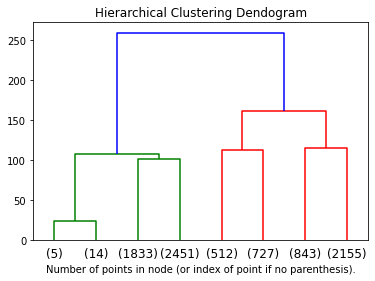

In [ ]:
#plot dendogram for AgglomerativeClustering
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(scaler_feature)

# plot the top p levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=2)

plt.title('Hierarchical Clustering Dendogram')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
# define the model
for n_clusters in range(1,6):
    # define the model
    model = GaussianMixture(n_components=n_clusters)

    # fit model and predict clusters
    y_pred = model.fit_predict(scaler_feature)

    #get information cluster

    #create datframe for statistics
    list1 = [ 'chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'zero_crossing_rate']
    list2 = [f'mfcc{i}' for i in range(1,21)]
    header = list1 + list2 
    df = pd.DataFrame(data = scaler_feature,columns=header)
    df['label'] = label
    df['pred_cluster'] = y_pred
    pd.set_option("display.max_columns", None)

    print("///////////////////////////////////////////////////////////////////////////////////")
    print(f"information each {n_clusters} cluster in GaussianMixture clustering algortihm with n_clusters = {n_clusters}")
    print("///////////////////////////////////////////////////////////////////////////////////")
    print()
    for cluster in np.unique(y_pred):
        temp_df = df.loc[df['pred_cluster'] == cluster ]
        print("------------------------------------------------------------------------------")
        print(f"information of cluster {cluster+1} in GaussianMixture clustering algortihm with n_clusters = {n_clusters}")
        print("------------------------------------------------------------------------------")
        print(temp_df.iloc[:, 0:26].describe())
        print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
        print(temp_df.label.value_counts())
        print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
        print()

///////////////////////////////////////////////////////////////////////////////////
information each 1 cluster in GaussianMixture clustering algortihm with n_clusters = 1
///////////////////////////////////////////////////////////////////////////////////

------------------------------------------------------------------------------
information of cluster 1 in GaussianMixture clustering algortihm with n_clusters = 1
------------------------------------------------------------------------------
        chroma_stft           rms  spectral_centroid  spectral_bandwidth  \
count  8.540000e+03  8.540000e+03       8.540000e+03        8.540000e+03   
mean  -2.952621e-16  5.896922e-17      -4.204092e-16       -1.305877e-17   
std    1.000059e+00  1.000059e+00       1.000059e+00        1.000059e+00   
min   -2.567334e+00 -2.143634e+00      -3.642415e+00       -3.560445e+00   
25%   -7.100893e-01 -7.538155e-01      -6.673715e-01       -5.564386e-01   
50%   -6.238222e-02 -4.481992e-02       3.443

##clustering metrics

In [ ]:
from time import time

def clustering_fit_stats(estimator, name, data):
    y = label
    t0 = time()
    y_pred = estimator.fit_predict(data)
    
    print('%-9s\t%.3fs\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f  %.3f'
          % (name, (time() - t0),
             sklearn.metrics.adjusted_rand_score(y, y_pred),
             sklearn.metrics.adjusted_mutual_info_score(y, y_pred),
             sklearn.metrics.normalized_mutual_info_score(y, y_pred),
             sklearn.metrics.homogeneity_score(y, y_pred),
             sklearn.metrics.completeness_score(y, y_pred),
             sklearn.metrics.v_measure_score(y,y_pred),
             sklearn.metrics.silhouette_score(data, y_pred, metric='euclidean'),
             sklearn.metrics.calinski_harabasz_score(data, y_pred),
             sklearn.metrics.davies_bouldin_score(data, y_pred)))

In [ ]:
print("Unscaled Data metrics clustering")
print('\n')
print('type\t\ttime\tR-Score\tAMI\tNMI\tHomo\tComp\tV-meas\tSilh\tCH-score  DB-score')
print(100 * '_')

clustering_fit_stats(KMeans(n_clusters= 5, random_state= 6), name="K-means5", data= features)
clustering_fit_stats(KMeans(n_clusters= 4, random_state= 6), name="K-means4", data= features)
clustering_fit_stats(KMeans(n_clusters= 3, random_state= 6), name="K-means3", data= features)
clustering_fit_stats(KMeans(n_clusters= 2, random_state= 6), name="K-means2", data= features)

clustering_fit_stats(AgglomerativeClustering(n_clusters= 5), name="Agglomerative5", data= features)
clustering_fit_stats(AgglomerativeClustering(n_clusters= 4), name="Agglomerative4", data= features)
clustering_fit_stats(AgglomerativeClustering(n_clusters= 3), name="Agglomerative3", data= features)
clustering_fit_stats(AgglomerativeClustering(n_clusters= 2), name="Agglomerative2", data= features)

clustering_fit_stats(GaussianMixture(n_components= 5), name="GMM-5", data= features)
clustering_fit_stats(GaussianMixture(n_components= 4), name="GMM-4", data= features)
clustering_fit_stats(GaussianMixture(n_components= 3), name="GMM-3", data= features)
clustering_fit_stats(GaussianMixture(n_components= 2), name="GMM-2", data= features)

Unscaled Data metrics clustering


type		time	R-Score	AMI	NMI	Homo	Comp	V-meas	Silh	CH-score  DB-score
____________________________________________________________________________________________________
K-means5 	1.173s	0.040	0.054	0.055	0.054	0.056	0.055	0.445	21376.390  0.675
K-means4 	0.719s	0.043	0.057	0.057	0.053	0.062	0.057	0.460	20171.128  0.654
K-means3 	0.295s	0.053	0.060	0.061	0.051	0.076	0.061	0.498	19076.708  0.621
K-means2 	0.256s	0.036	0.045	0.045	0.032	0.077	0.045	0.564	16820.099  0.594
Agglomerative5	3.014s	0.052	0.056	0.057	0.055	0.059	0.057	0.386	17632.216  0.697
Agglomerative4	3.097s	0.054	0.057	0.057	0.053	0.062	0.057	0.394	16974.542  0.681
Agglomerative3	3.109s	0.048	0.058	0.059	0.049	0.074	0.059	0.490	18450.867  0.619
Agglomerative2	2.903s	0.015	0.029	0.029	0.020	0.058	0.029	0.538	12160.518  0.552
GMM-5    	1.085s	0.034	0.050	0.051	0.044	0.059	0.051	0.035	3951.442  1.393
GMM-4    	1.233s	0.043	0.056	0.056	0.049	0.066	0.056	0.198	4086.525  2.006
GMM-3    	0.510s	0

In [ ]:
print("scaled Data metrics clustering")
print('\n')
print('type\t\ttime\tR-Score\tAMI\tNMI\tHomo\tComp\tV-meas\tSilh\tCH-score  DB-score')
print(100 * '_')

clustering_fit_stats(KMeans(n_clusters= 5, random_state= 6), name="K-means5", data= scaler_feature)
clustering_fit_stats(KMeans(n_clusters= 4, random_state= 6), name="K-means4", data= scaler_feature)
clustering_fit_stats(KMeans(n_clusters= 3, random_state= 6), name="K-means3", data= scaler_feature)
clustering_fit_stats(KMeans(n_clusters= 2, random_state= 6), name="K-means2", data= scaler_feature)

clustering_fit_stats(AgglomerativeClustering(n_clusters= 5), name="Agglomerative5", data= scaler_feature)
clustering_fit_stats(AgglomerativeClustering(n_clusters= 4), name="Agglomerative4", data= scaler_feature)
clustering_fit_stats(AgglomerativeClustering(n_clusters= 3), name="Agglomerative3", data= scaler_feature)
clustering_fit_stats(AgglomerativeClustering(n_clusters= 2), name="Agglomerative2", data= scaler_feature)

clustering_fit_stats(GaussianMixture(n_components= 5), name="GMM-5", data= scaler_feature)
clustering_fit_stats(GaussianMixture(n_components= 4), name="GMM-4", data= scaler_feature)
clustering_fit_stats(GaussianMixture(n_components= 3), name="GMM-3", data= scaler_feature)
clustering_fit_stats(GaussianMixture(n_components= 2), name="GMM-2", data= scaler_feature)


scaled Data metrics clustering


type		time	R-Score	AMI	NMI	Homo	Comp	V-meas	Silh	CH-score  DB-score
____________________________________________________________________________________________________
K-means5 	1.335s	0.046	0.062	0.063	0.062	0.063	0.063	0.078	962.636  2.338
K-means4 	0.821s	0.043	0.058	0.058	0.053	0.065	0.058	0.120	1124.824  2.394
K-means3 	0.549s	0.034	0.042	0.042	0.035	0.053	0.042	0.153	1411.242  2.203
K-means2 	0.356s	0.054	0.064	0.064	0.046	0.108	0.064	0.204	1947.647  1.932
Agglomerative5	3.153s	0.044	0.072	0.073	0.066	0.081	0.073	0.084	779.131  2.483
Agglomerative4	3.132s	0.047	0.072	0.073	0.064	0.085	0.073	0.076	892.996  2.584
Agglomerative3	3.181s	0.031	0.043	0.043	0.035	0.056	0.043	0.153	1129.275  2.486
Agglomerative2	3.336s	0.030	0.033	0.034	0.024	0.056	0.034	0.163	1518.748  2.156
GMM-5    	1.250s	0.040	0.054	0.054	0.049	0.062	0.054	0.111	571.837  3.390
GMM-4    	0.932s	0.055	0.061	0.061	0.054	0.070	0.061	0.086	731.083  3.131
GMM-3    	0.879s	0.040	0.054	0.05

In [ ]:
from pyclustertend import hopkins

print("The hopkins score of the dataset is: %.3f" %hopkins(X, 8540))